# Homework (10 pts) - Bootstrap and Permutation Test

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18

1. (2 pts) You record the resting potential of a cell (see below). Based on your sample data, what is the maximum likelihood estimate for the mean and standard deviation of the cell's resting potential?

In [2]:
restingPotential_mV = np.array([-85.06885608, -68.0333149 , -77.04147864, -70.82636201,
       -73.11516394, -70.87124656, -69.8945143 , -71.35017797,
       -78.97700081, -76.06762065, -80.16301496, -75.53757879,
       -66.29208026, -84.46635021, -74.99594162, -81.64926101,
       -69.43971079, -60.09946296, -66.79822251, -60.85633766,
       -54.32637416, -66.45195357, -82.98456323, -81.95661922,
       -60.47209247, -80.55272128, -62.85999264, -86.59379859,
       -78.64488589, -68.84506935, -80.77647186, -67.85623328,
       -74.45114227, -89.65579119, -82.64751201, -63.75968145,
       -74.22283582, -59.31586296, -93.0908073 , -73.64374549,
       -62.68738212, -57.96506437, -72.3717666 , -86.33058942,
       -78.92751452, -58.80136699, -85.71378949, -57.19191734,
       -91.30229149, -75.05287933, -75.33300218, -62.74969485,
       -79.59156555, -52.61256484, -77.21434863, -83.18228806,
       -62.06267252, -68.56599363, -74.33860286, -74.25433867,
       -67.10062548, -70.91001388, -74.54319772, -89.15247536,
       -72.25311527, -88.42966306, -77.76328165, -68.46582471,
       -75.94389499, -58.47565688, -71.13726886, -82.4352595 ,
       -61.93586705, -83.83289675, -51.7473573 , -72.18052423,
       -77.19392687, -87.97762782, -68.17409172, -62.04925685,
       -72.86214908, -69.43243604, -82.89191418, -67.91943956,
       -59.00530849, -62.53955662, -68.66192422, -73.86176431,
       -63.33605874, -84.78928316, -79.38590405, -85.06698722,
       -77.99176887, -70.8097979 , -70.458364  , -77.83905415,
       -79.05549124, -67.7530506 , -86.29135786, -60.87285052,
       -68.75028368, -69.48216823, -87.97546221, -74.25401398,
       -72.00639248, -73.25242423, -99.49034043, -81.86020062,
       -78.38191113, -68.64333415, -62.26209287, -75.46279644,
       -82.18768283, -77.45752358, -79.82870353, -69.4572625 ,
       -78.32253067, -73.59782921, -72.25046001, -80.64590368,
       -76.92874101, -90.79517065, -73.90324566, -81.67875556,
       -67.59862905, -81.49491813, -75.79660561, -81.14508062,
       -78.95641057, -80.56089537, -80.23390812, -72.4244641 ,
       -87.47818531, -73.59907449, -66.92882851, -67.87048944,
       -69.79223622, -67.11253617, -64.8935525 , -80.52556846,
       -78.19259758, -62.10604477, -95.98603544, -75.95599522,
       -66.3355366 , -80.87436998, -81.5009947 , -88.22430255,
       -83.72971765, -75.86416506, -82.52663772, -53.76916602,
       -66.21196557, -72.93868097, -91.42283677, -80.22444843,
       -75.08391826, -52.05541454, -72.0154604 , -80.24943593,
       -65.97047566, -81.62631839, -73.18646105, -70.85923137,
       -66.05248632, -60.82923084, -59.49883812, -78.38967591,
       -84.79797173, -95.00305539, -78.06355062, -71.60393851,
       -70.37115932, -86.7155815 , -65.38955127, -76.78546928,
       -79.85586826, -76.65572665, -71.50214043, -83.65681821,
       -59.9250123 , -76.05986927, -82.68107711, -70.01703154,
       -74.46337865, -63.38903087, -78.73136431, -76.56253395,
       -72.43137511, -52.60067507, -54.23945626, -63.68117735,
       -88.19424095, -76.29322833, -77.01457066, -72.88256829,
       -67.46931905, -60.91331725, -79.17094879, -74.96126989])

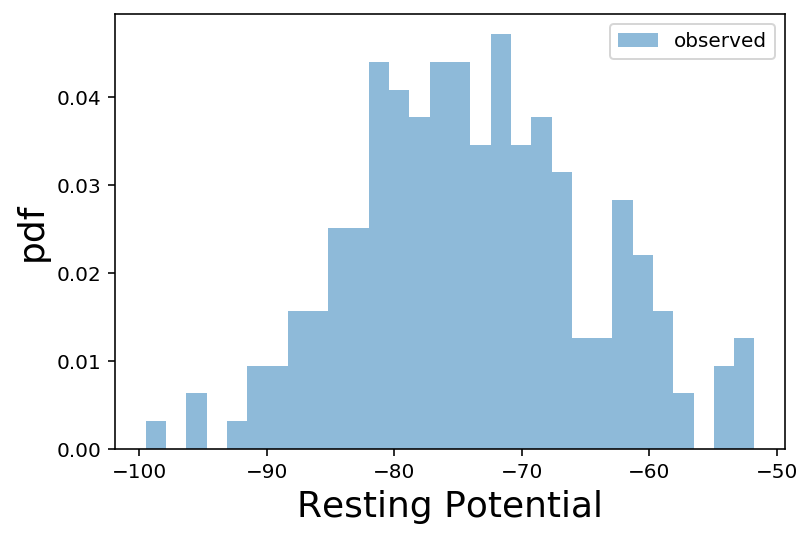

In [10]:

plt.hist(restingPotential_mV, 30, density=True, alpha=0.5, label='observed')
x = np.linspace(1, 100, 30)
plt.xlabel('Resting Potential')
plt.ylabel('pdf')
plt.legend();

In [4]:
mu, sd = st.norm.fit(restingPotential_mV)
print(f"MLE of mean resting potential is {mu :.1f} per cell.")
print(f"MLE of standard deviation in resting potential is {sd :.1f}")

MLE of mean resting potential is -73.9 per cell.
MLE of standard deviation in resting potential is 9.3


2. (3 pts) For the resting membrane potentials recorded above, use 1000 bootstrapped samples to estimate the 95% confidence interval of your MLE for both the mean and standard deviation. Plot the bootstrap mean and standard deviation distributions and show the MLE for each statistic and the 95% confidence intervals as vertical lines.

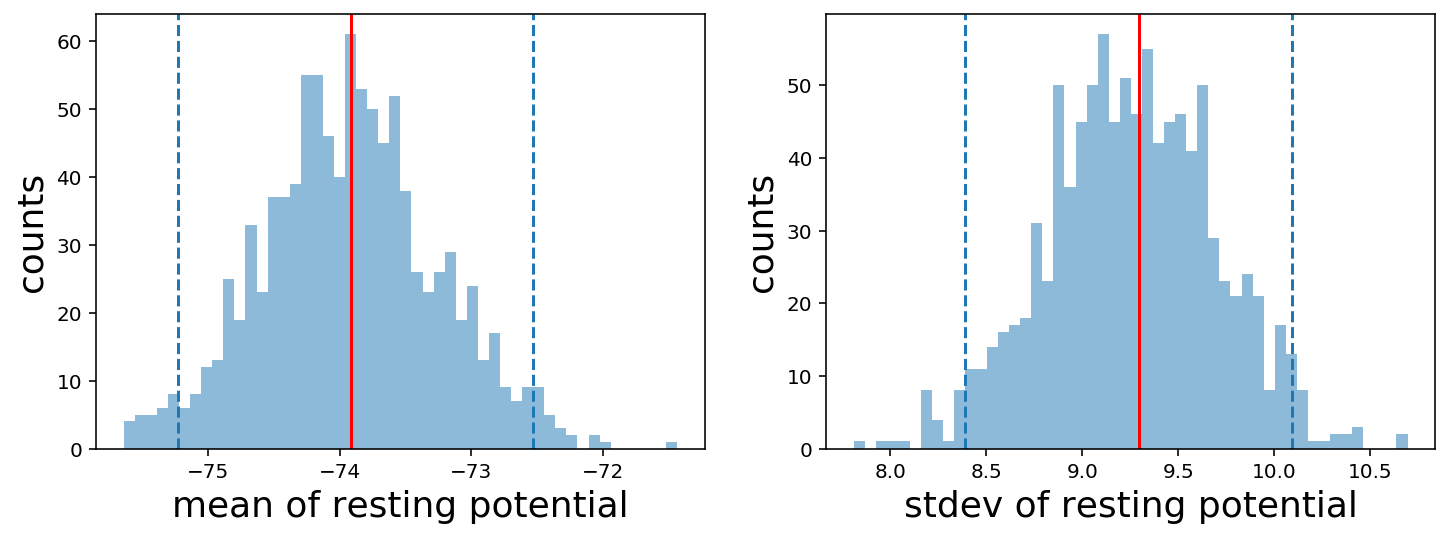

In [11]:
numBootstrapSampleSets = 1000

bootstrapMeans = np.zeros((numBootstrapSampleSets,))
bootstrapStdevs = np.zeros((numBootstrapSampleSets,))
# for each one grap bootstrapped obs. 
for i in range(numBootstrapSampleSets):
    bootstrapObservations = np.random.choice(restingPotential_mV, 
                                             size=restingPotential_mV.shape, replace=True)
    bmu, bsd = st.norm.fit(bootstrapObservations)
    bootstrapMeans[i] = bmu
    bootstrapStdevs[i] = bsd

bootstrapMeanCI = np.quantile(bootstrapMeans, [0.025, 0.975])
bootstrapStdevCI = np.quantile(bootstrapStdevs, [0.025, 0.975])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(bootstrapMeans, bins=50, alpha=0.5)
plt.axvline(mu)
# bounds
plt.axvline(bootstrapMeanCI[0], linestyle='--')
plt.axvline(bootstrapMeanCI[1], linestyle='--')
plt.axvline(mu, color='r')
plt.xlabel('mean of resting potential')
plt.ylabel('counts');

plt.subplot(1, 2, 2)
plt.hist(bootstrapStdevs, bins=50, alpha=0.5)
plt.axvline(sd)
plt.axvline(bootstrapStdevCI[0], linestyle='--')
plt.axvline(bootstrapStdevCI[1], linestyle='--')
plt.axvline(sd, color='r')
plt.xlabel('stdev of resting potential')
plt.ylabel('counts');

---
3. You measure the duration of high frequency bursts of action potentials under two different experimental conditions (call them conditions A and B). Based on your measured data below, do the conditions affect the time constant for the burst durations? See 3a-c below.

In [2]:
burstDurationsA_ms = np.array([180.38809356, 118.54316518,  47.36070342, 258.43152543,
       157.58441772,  53.00241256,  97.87549106,  98.58339172,
         3.82151168, 149.63437886,  78.36434292, 207.1499196 ,
       249.99308288,  52.33575872, 177.16295745,  20.90902826,
       355.53831638,  17.14676607, 194.82448255, 364.30099202,
        10.46025411,  63.80995802, 186.96964679,  16.76391482,
        66.04825185, 169.95991378, 174.85051452,  95.51534595,
       164.81818483, 165.92316127,  21.99840476, 176.27450914,
       367.20238806,  53.55081561,  18.54310649, 309.36915353,
        34.8110391 , 170.70514854,   4.80755719, 185.70861565,
        42.81031454,  77.63480453,  22.78673497,  27.15480627,
        81.19289909,   7.5754338 , 143.53588895,   1.45355329,
        56.93153072,  35.7227909 , 120.88947208, 268.68459917,
        36.56451611, 335.29492244,  18.88246351, 698.21607381,
        47.24456065,  68.47935918, 246.50352868,  39.17939247,
       130.00962739,  12.63485608,  16.5060213 ,  85.73872575,
        30.34193446,  12.18596266, 133.13145381,  39.68448593,
       227.5104642 , 274.45272375, 167.76767172,  23.93871685,
       319.05649273,   6.3491122 ,  35.14797547, 170.29631475,
        33.54342976,   2.71282041, 134.5042415 ,  42.498552  ,
       144.87658813, 122.78633957,  46.58727698, 143.74260009,
        27.95191179, 462.66535543, 187.17111074,  21.05730056,
        27.92875799,  73.0405984 , 137.67114744,  25.51076087,
        68.71066451, 188.46823412,  20.58525518,  18.06289499,
       388.79209834,   9.42246312, 270.11609469,  20.51123798])
burstDurationsB_ms = np.array([ 19.1579061 , 103.28099491, 155.40048778,  54.00532297,
        19.60552475,  38.33218511, 172.39377537, 100.60095889,
       123.39067736,  32.30752807, 140.81577413,  10.03036383,
        76.95250023, 111.4112118 , 106.77958145, 100.03741994,
        54.40736747, 169.72641863, 170.51048794,  84.31738796,
        32.48573515,  71.14968724,  18.07487628,  48.27775752,
       249.00817236,  40.88078534, 149.55876359, 171.68318734,
        64.7972247 , 179.67199065, 211.24354393,  49.54367304,
         5.97816835, 270.82356699,  99.33133967,  14.35603709,
        61.8917307 ,  48.13722571,  65.23703418, 119.95425274,
        64.3948595 ,  57.40459219,  18.76680104,  37.37173184,
       143.4622583 ,  21.6463496 ,  45.86107014,   3.98511098,
        11.8424448 , 105.59224929,  71.49909777,  29.64941255,
       117.62835465,  31.33284437, 124.17263642, 249.31437673,
        92.15958114,  66.2842341 ,   5.01333126,  18.53478564,
        44.09316335, 119.8752612 ,  52.31171617,   3.03888107,
       109.94031571,   5.52411681,  43.88839751,  48.63036147,
        22.71317076,  30.20052081,  32.10942778, 117.08796453,
        53.83369891,  68.82006208,  92.29204674,  93.829404  ,
         0.67985216,  10.42751195,   4.35827727, 127.21452508,
        42.69414115,  34.9520911 ,  20.16096766, 178.44190716,
        43.04340469,  89.11997718, 163.48474361, 277.29716851,
        17.08902205, 103.74782303,  49.29308393,  72.1459098 ,
        11.4600829 ,   4.09194418,  51.55511185,  91.81103802,
        31.36955782,  23.24407568,  90.13594215,  69.37118937])

3a. (1 pt) State the null and alternative hypotheses.

3b. (1 pt) Compute the MLE for the burst duration time constant in each condition. Hint: How do you get a time constant from a distribution of durations?

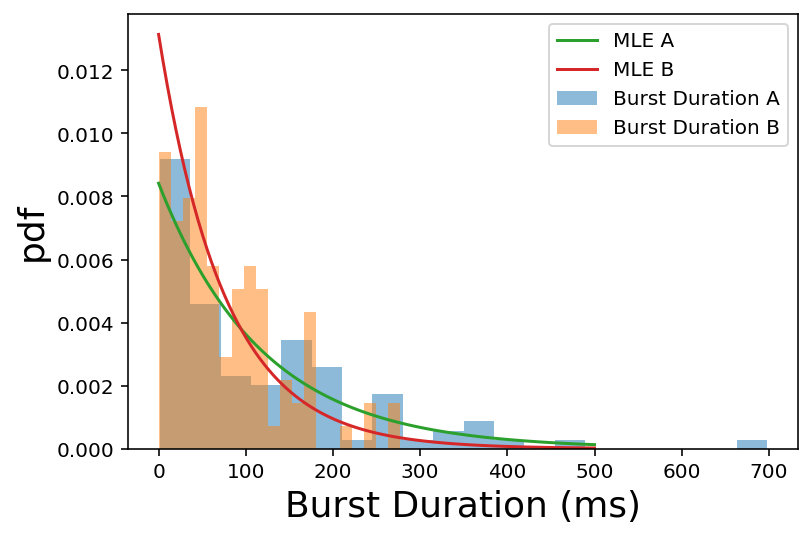

In [3]:
burstDurationsA_ms
burstDurationsB_ms
loc, tauA_ms = st.expon.fit(burstDurationsA_ms)
loc, tauB_ms = st.expon.fit(burstDurationsB_ms)
plt.hist(burstDurationsA_ms, bins=20, density=True, alpha=0.5, label='Burst Duration A')
plt.hist(burstDurationsB_ms, bins=20, density=True, alpha=0.5, label='Burst Duration B')
dur_ms = np.linspace(0, 500, 100)
plt.plot(dur_ms, st.expon.pdf(dur_ms, loc=0, scale=tauA_ms), label='MLE A')
plt.plot(dur_ms, st.expon.pdf(dur_ms, loc=0, scale=tauB_ms), label='MLE B')
plt.xlabel('Burst Duration (ms)');
plt.ylabel('pdf')
plt.legend();

# pmf is discrete and pdf is continuous 

In [4]:
loc, mleburstDurationsA_ms = st.expon.fit(burstDurationsA_ms, floc=0)
loc, mleburstDurationsB_ms = st.expon.fit(burstDurationsB_ms, floc=0)
print(f"MLE for burst duration A is {mleburstDurationsA_ms}")
print(f"MLE for burst duration B is {mleburstDurationsB_ms}")

MLE for burst duration A is 120.21448540849998
MLE for burst duration B is 76.7684260677


3c. (3 pt) Use a permutation test with 1000 permutations to test your null hypothesis. Plot the distribtuion of time constant differences from each permutation and indicate the MLE of this difference from the original observations with a solid vertical line. Use dashed vertical lines to indicate the 95% confidence interval from the permutation distribution. If there is an effect, report the effect size. Finally, answer the original question, do the conditions affect burst duration?

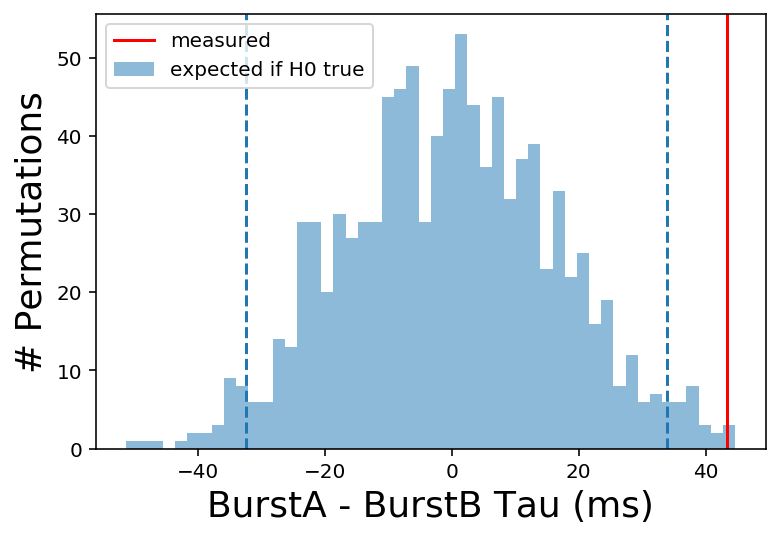

In [6]:
# permutation test

measuredTauDiff = mleburstDurationsA_ms - mleburstDurationsB_ms

nA = len(burstDurationsA_ms)
nB = len(burstDurationsB_ms)
allOpenTimes = np.zeros((nA + nB,))
allOpenTimes[:nA] = burstDurationsA_ms
allOpenTimes[-nB:] = burstDurationsA_ms

numPermutations = 1000
permutedTauDiffs = np.zeros((numPermutations,))

for i in range(numPermutations):
    np.random.shuffle(allOpenTimes)
    
    permutedburstA = allOpenTimes[:nA]
    permutedburstB = allOpenTimes[-nB:]
    
    loc, permutedburstATau = st.expon.fit(permutedburstA, floc=0)
    loc, permutedburstBTau = st.expon.fit(permutedburstB, floc=0)
    

    permutedTauDiffs[i] = permutedburstATau - permutedburstBTau


plt.hist(permutedTauDiffs, bins=50, alpha=0.5, label='expected if H0 true');

lb, ub = np.quantile(permutedTauDiffs, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

plt.axvline(measuredTauDiff, color='r', label='measured')
plt.xlabel('BurstA - BurstB Tau (ms)')
plt.ylabel('# Permutations')
plt.legend();

In [16]:
# compute the p-value 

numPermutationsMoreExtreme = (np.abs(permutedTauDiffs) > np.abs(measuredTauDiff)).sum()
numPermutationsMoreExtreme, numPermutations

(11, 1000)

In [17]:
pvalue = numPermutationsMoreExtreme / numPermutations
pvalue

0.011

In [18]:
# compute effect size 
effectSize = measuredTauDiff / sd
effectSize

4.673792104843656